<a href="https://colab.research.google.com/github/mohammedtlili/Detection-O-R/blob/main/projet_Raskelny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation,Dropout
from keras.models import Model,load_model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow.python.keras.engine
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd


'/content/drive'

In [ ]:
Train_path   =  '/content/drive/MyDrive/Colab Notebooks/Raskelny/DATASET/TRAIN'
Test_path    = '/content/drive/MyDrive/Colab Notebooks/Raskelny/DATASET/TEST'

In [ ]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names']) 
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(Train_path)
x_test, y_test,_ = load_dataset(Test_path)

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Training set size :  1612
Testing set size :  511


In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [ ]:
print ("x_train shape: " + str(x_train.shape))
print ("x_train shape: " + str(y_train.shape))
print ("x_validate shape: " + str(x_validate.shape))
print ("y_validate shape: " + str(y_validate.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (1289,)
x_train shape: (1289,)
x_validate shape: (323,)
y_validate shape: (323,)
x_test shape: (511,)
y_test shape: (511,)


In [ ]:
def convert_image_to_array(files):
    width, height, channels = 64, 64, 3
    images_as_array = np.empty((files.shape[0], width, height, channels), dtype=np.uint8) #define train and test data shape
    for idx,file in enumerate(files):
        img = cv2.imread(file) 
        res = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC) #As images have different size, resizing all images to have same shape of image array
        images_as_array[idx] = res
    return images_as_array

In [ ]:
x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)


Training set shape :  (1289, 64, 64, 3)


In [ ]:
x_valid = np.array(convert_image_to_array(x_validate))
print('Validation set shape : ',x_valid.shape)

Validation set shape :  (323, 64, 64, 3)


In [ ]:
x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (511, 64, 64, 3)


In [ ]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_validate = y_validate.reshape(y_validate.shape[0],1)


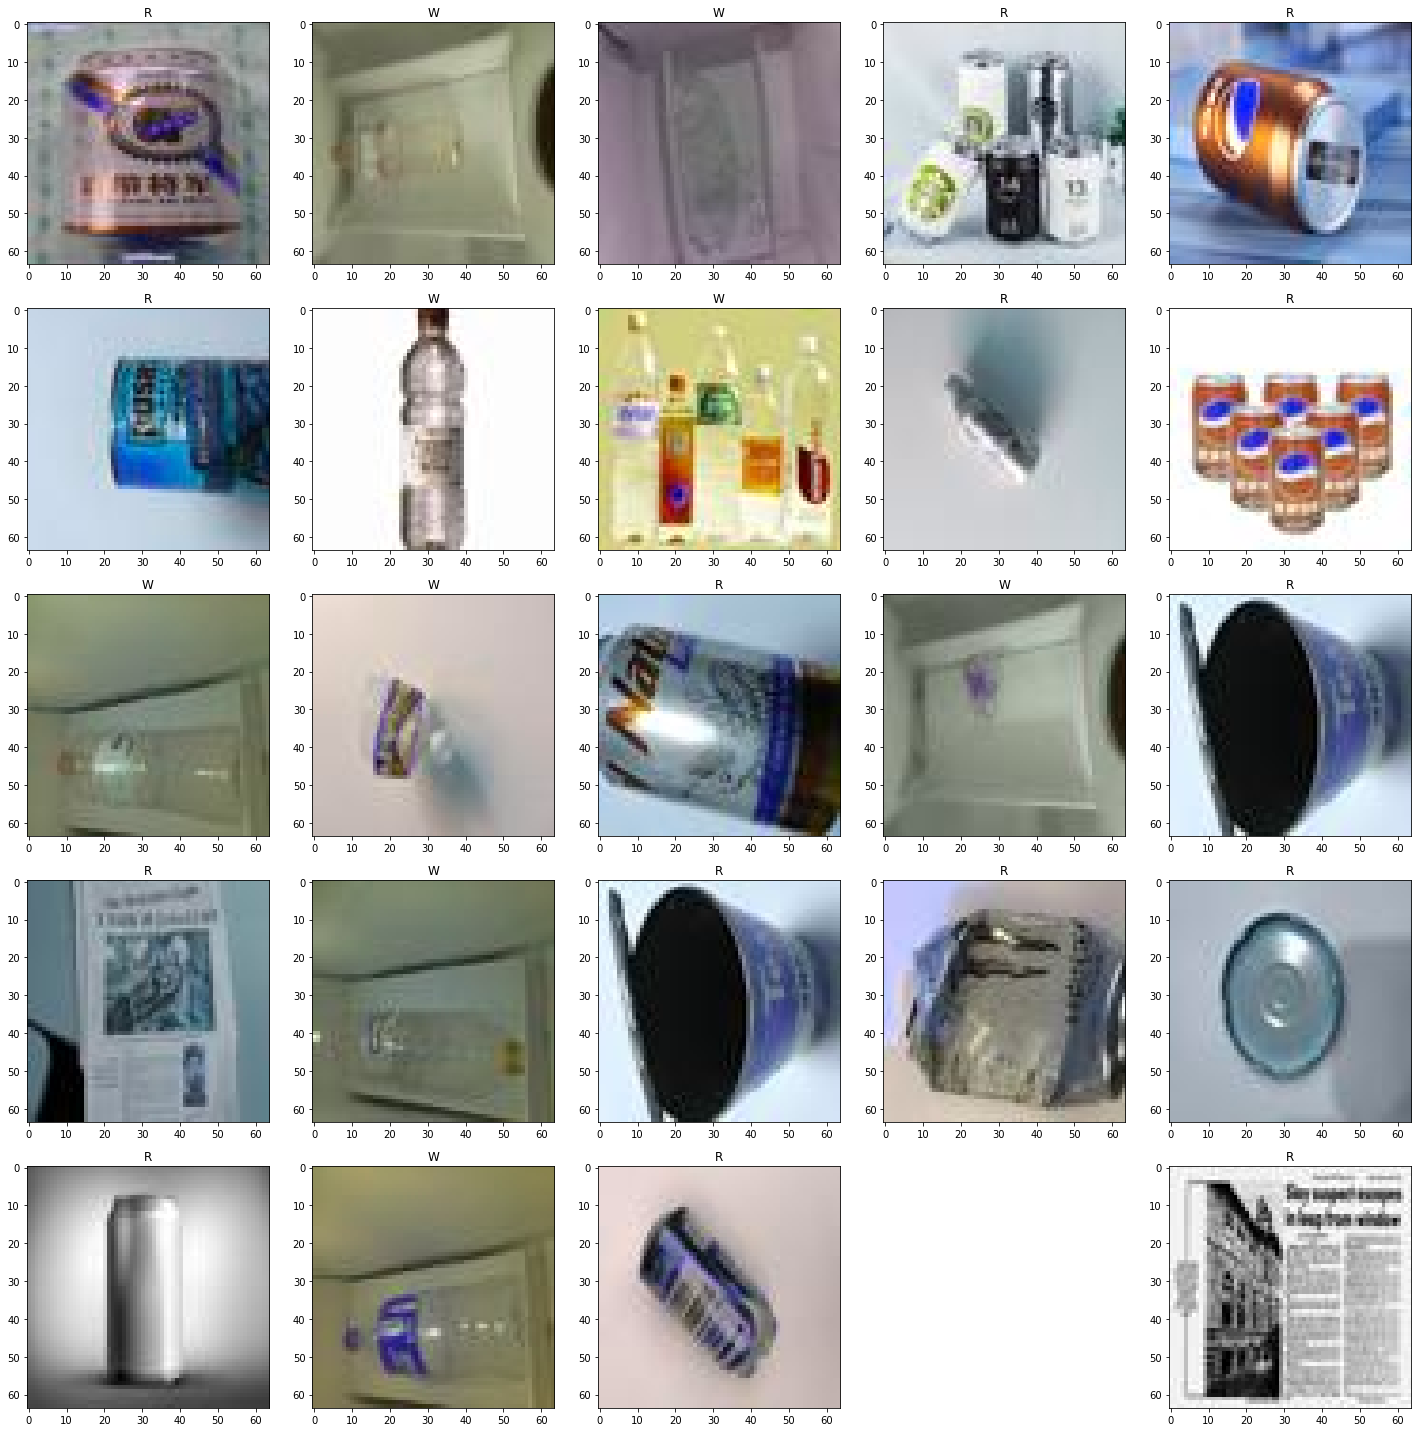

In [ ]:
plt.figure(figsize=(20,20))
classes = ['W','R']
for i in range(1,26):
    index = np.random.randint(x_train.shape[0])
    plt.subplot(5, 5, i)
    plt.imshow(np.squeeze(x_train[index]), cmap='cool')
    plt.title(classes[int(y_train[index])])
    plt.tight_layout()
plt.show()

In [ ]:
from glob import glob 

className = glob(Train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train) 

In [ ]:
NUM_CLASSES = 2
INPUT_SHAPE=x_train.shape[1:]

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
model = Sequential()
weight_decay = 1e-4
model.add(Conv2D(32, (3,3),
kernel_regularizer=regularizers.l2(weight_decay),kernel_initializer='he_uniform',padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('elu'))
model.add(Conv2D(32, (3,3),kernel_initializer='he_uniform',padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3),kernel_initializer='he_uniform',padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(Conv2D(64, (3,3),kernel_initializer='he_uniform',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3),kernel_initializer='he_uniform',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(Conv2D(128, (3,3),kernel_initializer='he_uniform',padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
#model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES,activation='softmax'))

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"]) 
batch_size = 256 

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255) 
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        Train_path, 
        target_size= (64,64),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        Test_path, 
        target_size= (64,64),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1612 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
7/7 [==============================] - 6s 779ms/step - loss: 2.3003 - accuracy: 0.5509 - val_loss: 1.0984 - val_accuracy: 0.4618
Epoch 2/10
7/7 [==============================] - 4s 584ms/step - loss: 0.8194 - accuracy: 0.6700 - val_loss: 0.6665 - val_accuracy: 0.7495
Epoch 3/10
7/7 [==============================] - 4s 590ms/step - loss: 0.4936 - accuracy: 0.8393 - val_loss: 0.5791 - val_accuracy: 0.7886
Epoch 4/10
7/7 [==============================] - 4s 580ms/step - loss: 0.3816 - accuracy: 0.8834 - val_loss: 0.5071 - val_accuracy: 0.8200
Epoch 5/10
7/7 [==============================] - 4s 585ms/step - loss: 0.3380 - accuracy: 0.9057 - val_loss: 0.4991 - val_accuracy: 0.8219
Epoch 6/10
7/7 [==============================] - 4s 559ms/step - loss: 0.3113 - accuracy: 0.9125 - val_loss: 0.5384 - val_accuracy: 0.8376
Epoch 7/10
7/7 [==============================] - 4s 588ms/step - loss: 0.3018 - accuracy: 0.9150 - val_loss: 0.4773 - val_accuracy: 0.8395
Epoch 8/10
7/7 [====

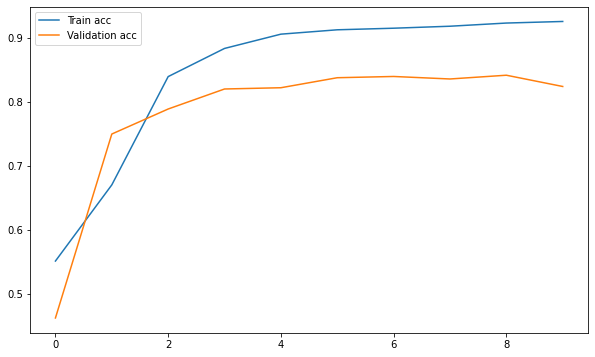

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

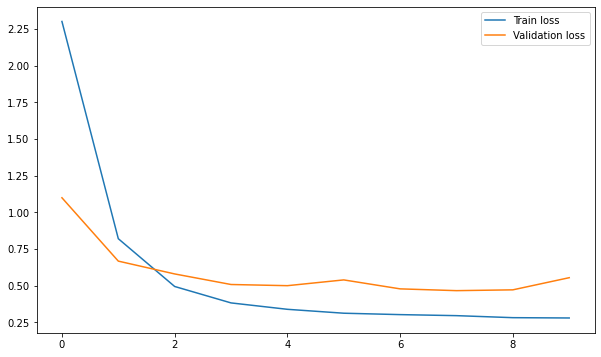

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

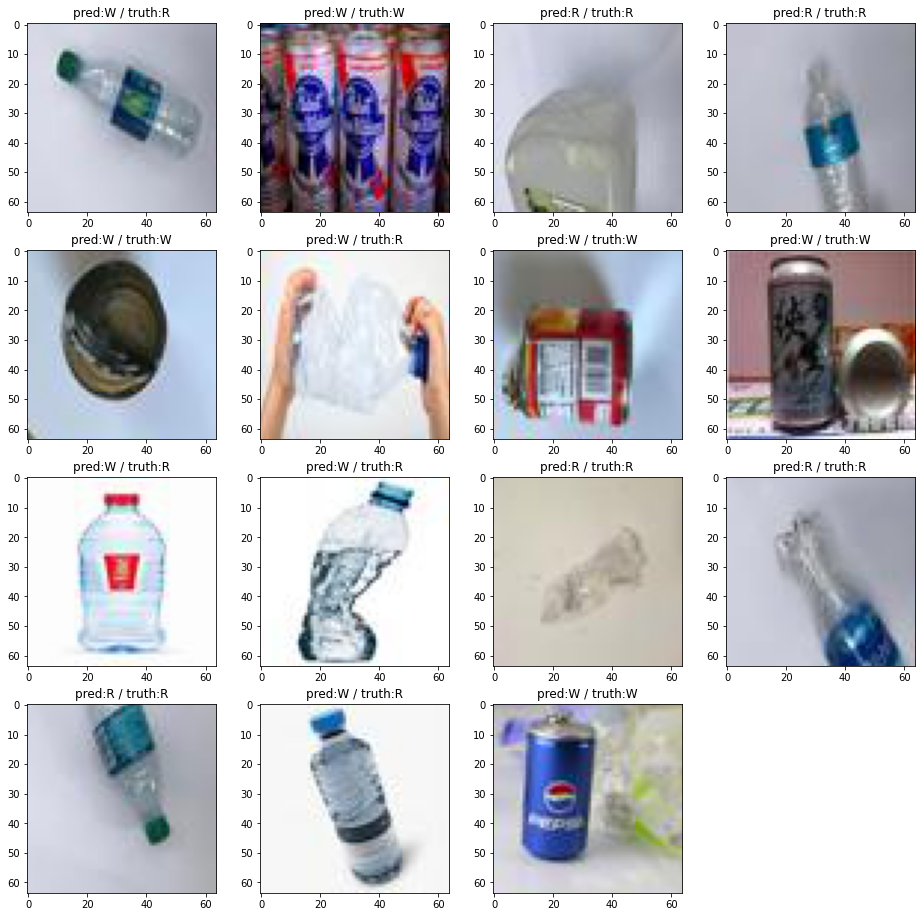

In [ ]:
test_x, test_y = test_generator.__getitem__(1)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])